In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Wholesale customers data.csv')
data.shape

(440, 8)

In [9]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [11]:
#seleccionar 3 datos al azar para luego verificar a q cluster pertenece
indices = [10,170,340]
muestras = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
muestras

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,3366,5403,12974,4400,5977,1744
1,2,3,260,8675,13430,1116,7015,323
2,2,3,381,4025,9670,388,7271,1371


In [12]:
data = data.drop(indices, axis=0)
data.shape

(437, 8)

In [13]:
#eliminar canal y region
data = data.drop(['Region','Channel'], axis=1)
muestras = muestras.drop(['Region','Channel'], axis=1)

In [14]:
#escalonamiento de la data
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escaladas = preprocessing.Normalizer().fit_transform(muestras)

In [15]:
data_escalada

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

In [16]:
muestras_escaladas

array([[0.20600623, 0.33067488, 0.7940359 , 0.26928919, 0.36580488,
        0.10673644],
       [0.01485719, 0.4957158 , 0.76743091, 0.06377162, 0.40085836,
        0.0184572 ],
       [0.0296831 , 0.31358128, 0.75337415, 0.03022846, 0.56647192,
        0.10681241]])

In [18]:
#Kmeans
from sklearn.cluster import KMeans

X = data_escalada.copy()
#Calcular el numero optimo de cluster con el metodo del codo
inercia = []
for i in range(1,20):
  algoritmo = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

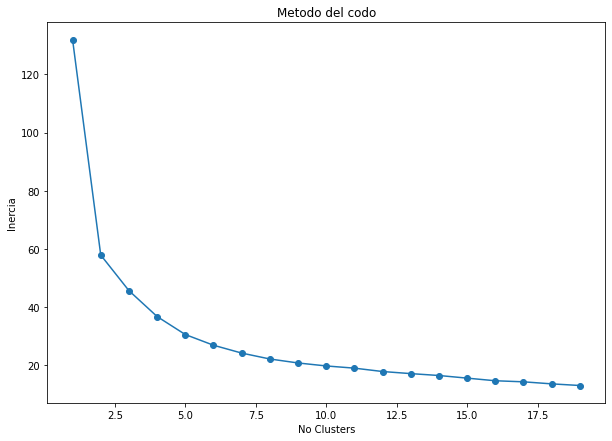

In [21]:
#graficar el metodo del codo
plt.figure(figsize=[10,7])
plt.title('Metodo del codo')
plt.xlabel('No Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()

In [23]:
#Aplicando algoritmo kmeans
kmeans = KMeans(n_clusters=6, init = 'k-means++', n_init = 10, max_iter = 300)
kmeans.fit(X)
centroides, labels = kmeans.cluster_centers_, kmeans.labels_

In [24]:
#reduccion de la dimencionalidad
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components= 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)
centroides_pca = modelo_pca.transform(centroides)

In [27]:
#preparacion grafica del cluster
colores = ['blue','red','green','orange','brown','magenta']
colores_cluster = [colores[labels[i]] for i in range(len(pca))]

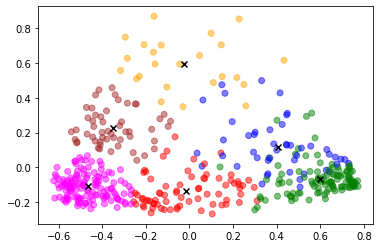

In [29]:
plt.scatter(pca[:,0],pca[:,1], c = colores_cluster, marker='o', alpha=0.5)
plt.scatter(centroides_pca[:, 0], centroides_pca[:,1], c = 'black', marker='x', linewidths=3)
